In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("../M2.01/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC())

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

shuffle= ShuffleSplit(random_state=0)
results= cross_validate(model, data, target, cv=shuffle, n_jobs=2)
results_df= pd.DataFrame(results)

results_df

,fit_time,score_time,test_score
0,0.006401,0.001456,0.680000
1,0.006116,0.001435,0.746667
2,0.006129,0.001406,0.786667
3,0.005772,0.001591,0.800000
4,0.005761,0.001326,0.746667
5,0.005620,0.001349,0.786667
6,0.005432,0.001289,0.800000
7,0.005048,0.001307,0.826667
8,0.005227,0.001304,0.746667
9,0.005312,0.001364,0.733333


In [15]:
print("Accuracy score of model :")
print(
    f"{results['test_score'].mean():.3f} ± "
    f"{results['test_score'].std():.3f}"
)

Accuracy score of model :
0.765 ± 0.041


/var/folders/gv/slspkkk160q39zrk5k9qg6qc0000gn/T/ipykernel_3950/136484709.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  validation_plot.figure_.show()


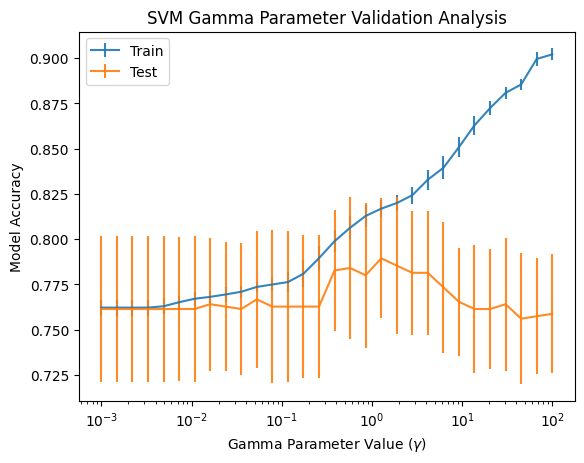

In [ ]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

gamma_values = np.logspace(-3, 2, num=30)
parameter_name = "svc__gamma"

validation_plot = ValidationCurveDisplay.from_estimator(
    estimator=model,
    X=data,
    y=target,
    param_name=parameter_name,
    param_range=gamma_values,
    cv=shuffle,
    scoring="accuracy",
    score_name="Accuracy",
    std_display_style="errorbar",
    errorbar_kw={"alpha": 0.9},
    n_jobs=2
)

validation_plot.ax_.set(
    xlabel=r"Gamma Parameter Value ($\gamma$)",
    title="SVM Gamma Parameter Validation Analysis",
    ylabel="Model Accuracy"
)

validation_plot.figure_.show()